In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [9]:
df = pd.read_csv('train.csv', index_col=0)
df.dropna(inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [10]:
df.shape

(183, 11)

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.drop('cabin',axis =1,inplace=True)
df.drop('ticket',axis =1,inplace=True)
df['age'].fillna(df['age'].mean(), inplace = True)
embark = pd.get_dummies(df['embarked'],drop_first=True)

In [12]:
df.isna().sum()

survived    0
pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [13]:
y = df['survived']
y


PassengerId
2      1
4      1
7      0
11     1
12     1
      ..
872    1
873    0
880    1
888    1
890    1
Name: survived, Length: 183, dtype: int64

In [14]:
df['sex']=df['sex'].replace(['male'],0)
df['sex']=df['sex'].replace(['female'],1)

In [15]:
X = df[['age', 'pclass', 'sex', 'fare']]
X

,age,pclass,sex,fare
PassengerId,,,,
2,38.0,1,1,71.2833
4,35.0,1,1,53.1000
7,54.0,1,0,51.8625
11,4.0,3,1,16.7000
12,58.0,1,1,26.5500
...,...,...,...,...
872,47.0,1,1,52.5542
873,33.0,1,0,5.0000
880,56.0,1,1,83.1583


<AxesSubplot:xlabel='age', ylabel='sex'>

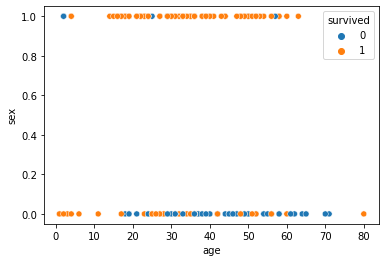

In [16]:
sns.scatterplot(x='age', y='sex' , hue='survived', data=df)

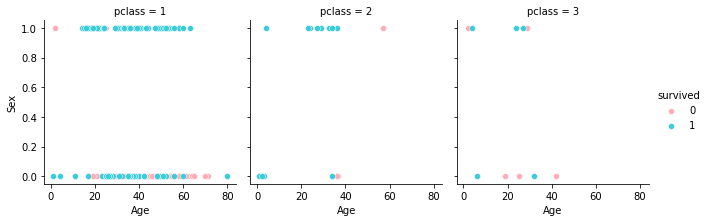

In [17]:
grid = sns.FacetGrid(data=df, col='pclass', hue='survived', palette=['#FFADB9', '#3BCCDA'] )
grid.map_dataframe(sns.scatterplot, x='age', y='sex')
grid.add_legend()
grid.set_xlabels("Age")
grid.set_ylabels("Sex")
sns.despine()


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
m = DecisionTreeClassifier(max_depth=3)  # we allow that many questions
m.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#make predictions to check the actual model

ypred = m.predict(X_test)

In [22]:
#make predictions to check the training model

ypredtrain = m.predict(X_train)

In [23]:
#accuracy score of the actual model 

accuracy_score(ypred, y_test)

0.8478260869565217

In [24]:
#calculate accuracy score of the training model 

accuracy_score(ypredtrain, y_train)

0.7883211678832117

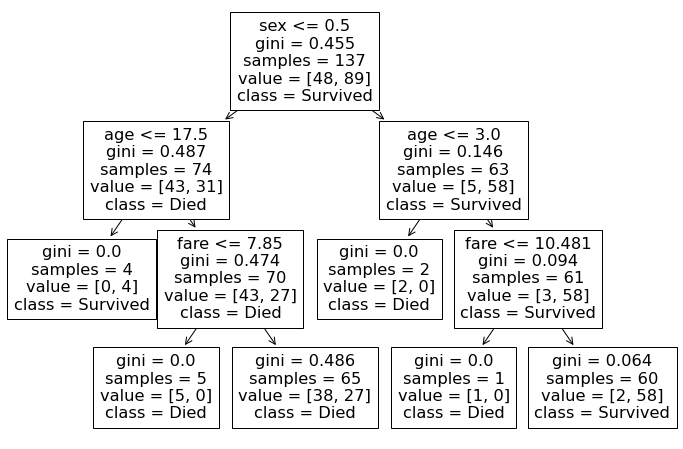

In [25]:
plt.figure(figsize=(12, 8))
t = plot_tree(m, feature_names=list(X), class_names=['Died','Survived'])